# Data Description

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

FEATURES:

Airline: The name of the airline.
Date_of_Journey: The date of the journey
Source: The source from which the service begins.
Destination: The destination where the service ends.
Route: The route taken by the flight to reach the destination.
Dep_Time: The time when the journey starts from the source.
Arrival_Time: Time of arrival at the destination.
Duration: Total duration of the flight.
Total_Stops: Total stops between the source and destination.
Additional_Info: Additional information about the flight
Price: The price of the ticket

# Import Required Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [88]:
#importing dataset from github

df_train=pd.read_excel(r'Flight_Train.xlsx')
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [89]:
df_test=pd.read_excel(r'Flight_Test.xlsx')
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


We have pulled the dataset from the github and will work on this dataset

In [90]:
df_train.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

We have a 11 columns in the dataset which are in int & object type.

In [91]:
print(df_train.shape)
print(df_test.shape)

(10683, 11)
(2671, 10)


We have a 10683 rows and 11 columns in the dataset in train data and 2671 rows and 10 columns in the test dataset.

In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [16]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


Based on the above info - I can see the train dataset have a null value in 2 columns which is Route & Total_Stops each have one null value in the dataset

Test dataset - we dont have any null value - It is good to go.

# Train Data Treatment

In [92]:
df_train["Journey_day"] = pd.to_datetime(df_train.Date_of_Journey, format="%d/%m/%Y").dt.day
df_train["Journey_month"] = pd.to_datetime(df_train["Date_of_Journey"], format = "%d/%m/%Y").dt.month
df_train["Dep_hour"]=pd.to_datetime(df_train["Dep_Time"]).dt.hour
df_train["Dep_min"]=pd.to_datetime(df_train["Dep_Time"]).dt.minute
df_train["Arrival_hour"] = pd.to_datetime(df_train.Arrival_Time).dt.hour
df_train["Arrival_min"] = pd.to_datetime(df_train.Arrival_Time).dt.minute
df_train.drop(["Date_of_Journey"],axis=1,inplace=True)
df_train.drop(["Dep_Time"],axis=1, inplace=True)
df_train.drop(["Arrival_Time"],axis=1,inplace=True)

Date of Journey - convert object type into int type - I have splited into two columns because day & Month will help to perform the prediction accurately.

Dep_Time - convert object type into int type - I have splited into two columns because hour & min will help to perform the prediction accurately.

Arrival_Time - convert object type into int type - I have splited into two columns because hour & min will help to perform the prediction accurately.

Also, I have dropped the "Data of journey","Dep_Time" & "Arrival_Time" columns because we splitted into two columns each.

In [93]:
duration = list(df_train["Duration"])
for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"
        else:
            duration[i] = "0h " + duration[i]
duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration
df_train["Duration_hours"] = duration_hours
df_train["Duration_mins"] = duration_mins
df_train.drop(["Duration"], axis = 1, inplace = True)

Duration - We can't split the data easily because it contain different format hence i used the "for" if range function.

In [94]:
df_train.drop(["Route","Additional_Info"],axis=1,inplace=True)

I have dropped this 2 columns because it contain the unwanted info hence i decided to drop

In [95]:
df_train["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [96]:
df_train["Total_Stops"].fillna(0,inplace=True)

In [97]:
df_train.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [98]:
df_train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [99]:
df_train=df_train[['Airline','Source','Destination','Total_Stops','Journey_day','Journey_month','Dep_hour','Dep_min','Arrival_hour','Arrival_min','Duration_hours','Duration_mins','Price']]
df_train.head()

,Airline,Source,Destination,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Price
0,IndiGo,Banglore,New Delhi,0,24,3,22,20,1,10,2,50,3897
1,Air India,Kolkata,Banglore,2,1,5,5,50,13,15,7,25,7662
2,Jet Airways,Delhi,Cochin,2,9,6,9,25,4,25,19,0,13882
3,IndiGo,Kolkata,Banglore,1,12,5,18,5,23,30,5,25,6218
4,IndiGo,Banglore,New Delhi,1,1,3,16,50,21,35,4,45,13302


I have rearranged the data frame and moved the price column to last as a target column because it will help me to understand better.

# Test Data Treatment

In [100]:
df_test["Journey_day"] = pd.to_datetime(df_test.Date_of_Journey, format="%d/%m/%Y").dt.day
df_test["Journey_month"] = pd.to_datetime(df_test["Date_of_Journey"], format = "%d/%m/%Y").dt.month
df_test["Dep_hour"]=pd.to_datetime(df_test["Dep_Time"]).dt.hour
df_test["Dep_min"]=pd.to_datetime(df_test["Dep_Time"]).dt.minute
df_test["Arrival_hour"] = pd.to_datetime(df_test.Arrival_Time).dt.hour
df_test["Arrival_min"] = pd.to_datetime(df_test.Arrival_Time).dt.minute
df_test.drop(["Date_of_Journey"],axis=1,inplace=True)
df_test.drop(["Dep_Time"],axis=1, inplace=True)
df_test.drop(["Arrival_Time"],axis=1,inplace=True)

In [101]:
duration = list(df_test["Duration"])
for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"
        else:
            duration[i] = "0h " + duration[i]
duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration
df_test["Duration_hours"] = duration_hours
df_test["Duration_mins"] = duration_mins
df_test.drop(["Duration"], axis = 1, inplace = True)

In [102]:
df_test.drop(["Route","Additional_Info"],axis=1,inplace=True)
df_test.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)
df_test.head()

,Airline,Source,Destination,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,Jet Airways,Delhi,Cochin,1,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,1,12,5,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,1,21,5,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,1,21,5,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,0,24,6,23,55,2,45,2,50


# Data Checking

In [103]:
df_train.isnull().sum()

Airline           0
Source            0
Destination       0
Total_Stops       0
Journey_day       0
Journey_month     0
Dep_hour          0
Dep_min           0
Arrival_hour      0
Arrival_min       0
Duration_hours    0
Duration_mins     0
Price             0
dtype: int64

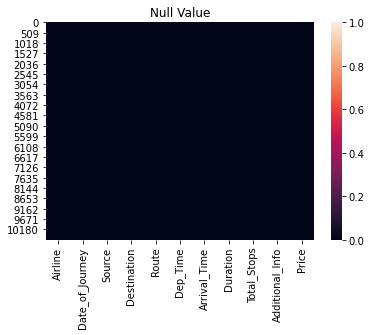

In [104]:
sns.heatmap(df.isnull())
plt.title("Null Value")
plt.show()

Just I ensure through visualization - We don't gave a null value in the dataset.

In [105]:
df_train.dtypes

Airline           object
Source            object
Destination       object
Total_Stops        int64
Journey_day        int64
Journey_month      int64
Dep_hour           int64
Dep_min            int64
Arrival_hour       int64
Arrival_min        int64
Duration_hours     int64
Duration_mins      int64
Price              int64
dtype: object

# Describe Dataset

In [106]:
#Statistical Summary
df_train.describe()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Price
count,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000
mean,0.824113,13.508378,4.708602,12.490686,24.411214,13.348778,24.690630,10.246092,28.327717,9087.064121
std,0.675244,8.479277,1.164357,5.748650,18.767980,6.859125,16.506036,8.495414,16.945400,4611.359167
min,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1759.000000
25%,0.000000,6.000000,3.000000,8.000000,5.000000,8.000000,10.000000,2.000000,15.000000,5277.000000
50%,1.000000,12.000000,5.000000,11.000000,25.000000,14.000000,25.000000,8.000000,30.000000,8372.000000
75%,1.000000,21.000000,6.000000,18.000000,40.000000,19.000000,35.000000,15.000000,45.000000,12373.000000
max,4.000000,27.000000,6.000000,23.000000,55.000000,23.000000,55.000000,47.000000,55.000000,79512.000000


We have a outlier and skewness in the columns in the dataset. So we will check in further step

# Correlation

In [107]:
df_train.corr()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Price
Total_Stops,1.000000,-0.009348,0.054351,-0.061402,-0.002743,0.038209,-0.106934,0.739614,-0.136773,0.603891
Journey_day,-0.009348,1.000000,-0.038378,0.002220,-0.008261,-0.003192,-0.017511,-0.022181,-0.008996,-0.153738
Journey_month,0.054351,-0.038378,1.000000,0.039112,-0.059238,-0.003941,-0.100626,0.016175,-0.040880,-0.103651
Dep_hour,-0.061402,0.002220,0.039112,1.000000,-0.024806,0.005215,0.067909,0.002783,-0.023746,0.006819
Dep_min,-0.002743,-0.008261,-0.059238,-0.024806,1.000000,0.043054,-0.017594,-0.021946,0.092548,-0.024492
Arrival_hour,0.038209,-0.003192,-0.003941,0.005215,0.043054,1.000000,-0.154362,0.055180,-0.118345,0.024264
Arrival_min,-0.106934,-0.017511,-0.100626,0.067909,-0.017594,-0.154362,1.000000,-0.074439,0.151626,-0.086155
Duration_hours,0.739614,-0.022181,0.016175,0.002783,-0.021946,0.055180,-0.074439,1.000000,-0.126355,0.508672
Duration_mins,-0.136773,-0.008996,-0.040880,-0.023746,0.092548,-0.118345,0.151626,-0.126355,1.000000,-0.124874
Price,0.603891,-0.153738,-0.103651,0.006819,-0.024492,0.024264,-0.086155,0.508672,-0.124874,1.000000


We got the correlation result from the dataset. But It is difficult to understand the result Hence we are visualization this result through heatmap.

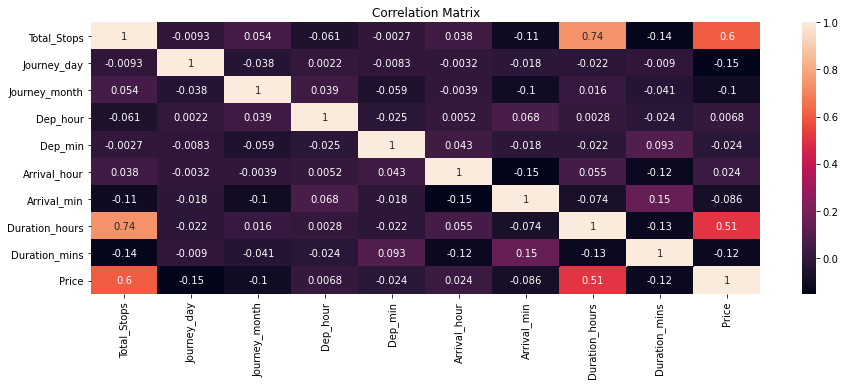

In [108]:
corr_mat=df_train.corr()
plt.figure(figsize=[15,5])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

# Outcome of Correlation

We can see the positive and negative correlation with the target column. Hence, I have listed below on ascending order

Also,We can strong correlation with Total_Stop with 60% and Duration_hours with 51%.

# Data Encoding

In [109]:
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in df_train.columns:
    if df_train[i].dtypes=="object":
        df_train[i]=OE.fit_transform(df_train[i].values.reshape(-1,1)).astype(int)
df_train.head()

,Airline,Source,Destination,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Price
0,3,0,5,0,24,3,22,20,1,10,2,50,3897
1,1,3,0,2,1,5,5,50,13,15,7,25,7662
2,4,2,1,2,9,6,9,25,4,25,19,0,13882
3,3,3,0,1,12,5,18,5,23,30,5,25,6218
4,3,0,5,1,1,3,16,50,21,35,4,45,13302


In [110]:
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in df_test.columns:
    if df_test[i].dtypes=="object":
        df_test[i]=OE.fit_transform(df_test[i].values.reshape(-1,1)).astype(int)
df_test.head()

,Airline,Source,Destination,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,4,2,1,1,6,6,17,30,4,25,10,55
1,3,3,0,1,12,5,6,20,10,20,4,0
2,4,2,1,1,21,5,19,15,19,0,23,45
3,6,2,1,1,21,5,8,0,21,0,13,0
4,0,0,2,0,24,6,23,55,2,45,2,50


# Outlier Checking 

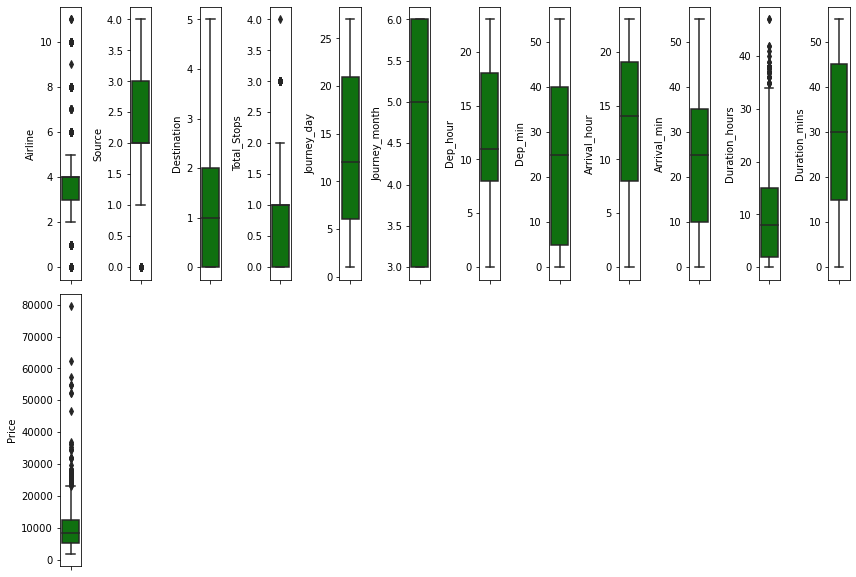

In [111]:
collist=df_train.columns.values
ncol=12
nrow=6
plt.figure(figsize=(ncol,2*ncol))
for i in range (0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(df_train[collist[i]],color='green',orient='v')
    plt.tight_layout()

In the above - we have a outlier in some of the columns which are Total_Stops, Duration_Hours & Price. Also have in Airline.

Price columns having a more outlier when comparing to other outlier columns. Because other outlier columns are near to Whisker So,we will rectify in further step

# Checking Skewness

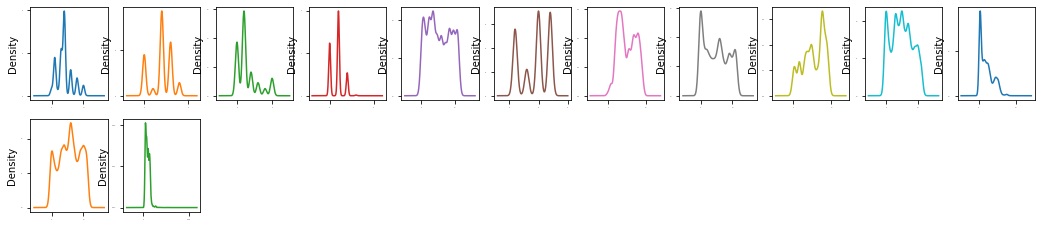

In [112]:
df_train.plot(kind='density',subplots=True,layout=(6,11),sharex=False,legend=False,fontsize=1,figsize=(18,12))
plt.show()

In [113]:
df_train.skew()

Airline           0.731095
Source           -0.424054
Destination       1.244169
Total_Stops       0.317230
Journey_day       0.118351
Journey_month    -0.387493
Dep_hour          0.113073
Dep_min           0.167029
Arrival_hour     -0.369988
Arrival_min       0.110945
Duration_hours    0.850862
Duration_mins    -0.090841
Price             1.812552
dtype: float64

From the above info - we can see the skewness in the dataset. So, We will rectify this in upcoming step.

Also, We can consider the -/+.5 is standard

# Data Cleaning

# Removing Outlier

In [114]:
from scipy.stats import zscore
z=np.abs(zscore(df_train))
print(z.shape)
threshold=3
print(np.where(z>3))

(10683, 13)
(array([  123,   226,   396,   402,   486,   510,   553,   597,   628,
         657,   785,   826,   919,   936,   946,   959,   966,   969,
         975,  1067,  1113,  1196,  1218,  1246,  1341,  1346,  1424,
        1442,  1466,  1478,  1496,  1551,  1629,  1654,  1657,  1665,
        1785,  1791,  1804,  1918,  2055,  2099,  2108,  2172,  2172,
        2495,  2553,  2556,  2618,  2623,  2633,  2635,  2641,  2654,
        2693,  2718,  2718,  2814,  2822,  2924,  3032,  3111,  3157,
        3220,  3257,  3317,  3400,  3457,  3496,  3535,  3568,  3584,
        3700,  3790,  3815,  3815,  3945,  3966,  4012,  4047,  4118,
        4118,  4463,  4463,  4521,  4655,  4655,  4676,  4760,  4829,
        5013,  5050,  5136,  5372,  5439,  5446,  5516,  5662,  5701,
        5701,  5710,  5711,  5719,  5738,  5745,  5782,  5838,  5856,
        5933,  5947,  5953,  5986,  5996,  6059,  6085,  6314,  6321,
        6407,  6444,  6476,  6576,  6588,  6599,  6605,  6884,  6884,
       

In [115]:
df_new=df_train[(z<3).all(axis=1)]
print(df_train.shape)
print(df_new.shape)

(10683, 13)
(10489, 13)


We have applied ZSCORE technic for removing outlier in the dataset.

In [116]:
Loss_percentage=(10683-10489)/10683*100
print(Loss_percentage)

1.8159692970139474


After removing the outlier - we have only 2% dataloss. So it is good to go with this data.

# Same treatment has Applied in Test Data

In [117]:
from scipy.stats import zscore
z=np.abs(zscore(df_test))
print(z.shape)
threshold=3
print(np.where(z>3))

(2671, 12)
(array([  72,  251,  251,  484,  510,  673,  725,  786,  875,  877, 1022,
       1271, 1279, 1379, 1511, 1554, 1686, 1689, 1689, 1781, 1918, 1945,
       2021, 2114, 2359, 2422, 2442, 2472, 2487, 2492], dtype=int64), array([ 3,  3, 10,  3, 10,  3,  3, 10,  3,  3, 10, 10, 10, 10, 10, 10, 10,
        3, 10, 10, 10, 10,  3, 10, 10,  3,  3, 10,  3, 10], dtype=int64))


In [118]:
df_new1=df_test[(z<3).all(axis=1)]
print(df_test.shape)
print(df_new1.shape)

(2671, 12)
(2643, 12)


# Creating Feature and Test column for model

In [119]:
X=df_new.iloc[:,:-1]
Y=df_new.iloc[:,-1]

I have created the feature and target columns. It will help me to do trian & test for preparing model

# Data Transform for Remove Skewness

In [121]:
from sklearn.preprocessing import power_transform
DF=power_transform(X,method='yeo-johnson')
DF=pd.DataFrame(DF,columns=X.columns)

In [122]:
DF.skew()

Airline          -0.013767
Source           -0.236586
Destination       0.041175
Total_Stops      -0.070789
Journey_day      -0.203756
Journey_month    -0.223686
Dep_hour         -0.107028
Dep_min          -0.358016
Arrival_hour     -0.353510
Arrival_min      -0.351111
Duration_hours   -0.030838
Duration_mins    -0.378936
dtype: float64

In [123]:
from sklearn.preprocessing import power_transform
DF2=power_transform(df_new1,method='yeo-johnson')
DF2=pd.DataFrame(DF2,columns=df_new1.columns)

In [124]:
DF2.skew()

Airline          -0.041774
Source           -0.239961
Destination       0.039909
Total_Stops      -0.074843
Journey_day      -0.180968
Journey_month    -0.230023
Dep_hour         -0.109347
Dep_min          -0.371605
Arrival_hour     -0.403606
Arrival_min      -0.356215
Duration_hours   -0.037126
Duration_mins    -0.377364
dtype: float64

We have removed the skewness from the dadaset. Let use this for model preparation.

# Finding the best model and Random State

In [157]:
from sklearn.preprocessing import StandardScaler
SC=StandardScaler()
X1=SC.fit_transform(DF2)

In [158]:
from sklearn.preprocessing import StandardScaler
SC=StandardScaler()
x=SC.fit_transform(DF)

In [131]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxAccu=0
maxRS=0
for i in range (0,100):
    x_train,x_test,Y_train,Y_test = train_test_split(x,Y,test_size=.30,random_state=i)
    LR =LinearRegression()
    LR.fit(x_train,Y_train)
    PX1=LR.predict(x_train)
    PY1=LR.predict(x_test)
    R2 = r2_score(Y_test, PY1)
    if R2>maxAccu:
        maxAccu=R2
        maxRS=i
print("Best Accuracy is",maxAccu*100,"on Random state",maxRS)

Best Accuracy is 56.2615686564913 on Random state 58


In [132]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
maxAccu=0
maxRS=0
for i in range (0,100):
    x_train,x_test,Y_train,Y_test = train_test_split(x,Y,test_size=.30,random_state=i)
    LA =Lasso()
    LA.fit(x_train,Y_train)
    PX2=LA.predict(x_train)
    PY2=LA.predict(x_test)
    R2 = r2_score(Y_test, PY2)
    if R2>maxAccu:
        maxAccu=R2
        maxRS=i
print("Best Accuracy is",maxAccu*100,"on Random state",maxRS)

Best Accuracy is 56.26593923734291 on Random state 58


In [133]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
maxAccu=0
maxRS=0
for i in range (0,100):
    x_train,x_test,Y_train,Y_test = train_test_split(x,Y,test_size=.30,random_state=i)
    RR =Ridge()
    RR.fit(x_train,Y_train)
    PX3=RR.predict(x_train)
    PY3=RR.predict(x_test)
    R2 = r2_score(Y_test,PY3)
    if R2>maxAccu:
        maxAccu=R2
        maxRS=i
print("Best Accuracy is",maxAccu*100,"on Random state",maxRS)

Best Accuracy is 56.261901117559 on Random state 58


In [137]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score

maxAccu=0
maxRS=0
for i in range (0,100):
    x_train,x_test,Y_train,Y_test = train_test_split(x,Y,test_size=.30,random_state=i)
    EL =ElasticNet()
    EL.fit(x_train,Y_train)
    PX4=EL.predict(x_train)
    PY4=EL.predict(x_test)
    R2 = r2_score(Y_test,PY4)
    if R2>maxAccu:
        maxAccu=R2
        maxRS=i
print("Best Accuracy is",maxAccu*100,"on Random state",maxRS)

Best Accuracy is 52.938529809694046 on Random state 58


Best Accuracy score got from the model which are below i have listed:

1) LinearRegression score is - 56%  
2) Lasso score is - 56%  
3) Ridge score is - 56%  
4) ElasticNet score is - 53%

Based on the above score - 3 models have a same score However, we will check with cross validation score then finalize the model.

# Creating the Train_Test_Split

In [138]:
x_train,x_test,Y_train,Y_test = train_test_split(x,Y,test_size=.30,random_state=58)

# Cross-Validation of the Model

In [144]:
from sklearn.model_selection import cross_val_score
cv1_score=cross_val_score(LR,x,Y,cv=5)
cv2_score=cross_val_score(LA,x,Y,cv=5)
cv3_score=cross_val_score(RR,x,Y,cv=5)
cv4_score=cross_val_score(EL,x,Y,cv=5)
cv1_mean=cv1_score.mean()
cv2_mean=cv2_score.mean()
cv3_mean=cv3_score.mean()
cv4_mean=cv4_score.mean()
print(f"Cross Validation Score of is :",cv1_mean*100)
print(f"Cross Validation Score of is :",cv2_mean*100)
print(f"Cross Validation Score of is :",cv3_mean*100)
print(f"Cross Validation Score of is :",cv4_mean*100)

Cross Validation Score of is : 53.42926402656154
Cross Validation Score of is : 53.429187042695894
Cross Validation Score of is : 53.42927987668639
Cross Validation Score of is : 50.2571233556681


We have a cross validation score which will help us to choose the model.

I have choosed the LinearRegression model because it have 3% minimum difference with cross validation score.

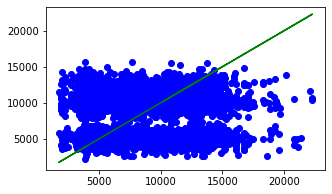

In [145]:
plt.figure(figsize=(5,3))
plt.scatter(x=Y_test,y=PY2,color='b')
plt.plot(Y_test,Y_test,color='g')
plt.show()

# Regularization

In [149]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
parameters = {'alpha':[.0001, .001, .01, .1, 1, 10, 100],'random_state':list(range(0,100))}
clf=GridSearchCV(RR,parameters)
clf.fit(x_train,Y_train)
print(clf.best_params_)

{'alpha': 100, 'random_state': 0}


In [151]:
RR=Ridge(alpha=100,random_state=0)
RR.fit(x_train,Y_train)
RR.score(x_train,Y_train)
predict=RR.predict(x_test)
LR=r2_score(Y_test,predict)
print("Linear Score :",LR*100)

cv_score=cross_val_score(RR,x,Y,cv=5)
cv_mean=cv_score.mean()
print("CV Score :",cv_mean*100)

Linear Score : 56.283938785168495
CV Score : 53.42574203447853


# Ensemblie Technique

In [152]:
from sklearn.ensemble import RandomForestRegressor
parameters={'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}
RF=RandomForestRegressor()
clf=GridSearchCV(RF,parameters)
clf.fit(x_train,Y_train)
print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'auto'}


In [153]:
RF=RandomForestRegressor(criterion="mae",max_features="auto")
RF.fit(x_train,Y_train)
RF.score(x_train,Y_train)
pred=RF.predict(x_test)
RFS=r2_score(Y_test,pred)
print("R2 Score :",RFS*100)

rfs=cross_val_score(RF,x,Y,cv=4)
rfc=rfs.mean()
print("CV Score :",rfc*100)

R2 Score : 82.69584697514189
CV Score : 81.70158405065875


# Model Saving

In [154]:
import pickle
filename='Ticket_Project.pkl'
pickle.dump(RF,open(filename,'wb'))

# Conclusion

In [155]:
Loaded_load = pickle.load(open('Ticket_Project.pkl','rb'))
Result=Loaded_load.score(x_test,Y_test)
print(Result)

0.826958469751419


In [160]:
Conclusion=pd.DataFrame([Loaded_load.predict(X1)],index=["Predicted"])
Conclusion

,0,1,2,3,4,5,6,7,8,9,...,2633,2634,2635,2636,2637,2638,2639,2640,2641,2642
Predicted,11441.88,4226.0,14276.06,12332.85,3677.66,10280.9,10679.425,5586.86,4604.84,13135.085,...,11123.885,3160.965,6867.89,6902.59,2013.42,10167.93,5063.72,14726.88,13377.16,7212.41


Output from the model - The Prediction is seems like very accurate. So the model is performing very well